## Some tests of yt

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from clawpack.pyclaw import Solution
import numpy as np
import matplotlib.pyplot as plt
import yt
from IPython.display import Image

In [68]:
def load_yt(frame):
    """
    Load a frame of amrclaw data and reformat for yt.
    """
    sol = Solution(frame,path='_output',file_format='ascii')
    grid_data = []
     
    for state in sorted(sol.states, key = lambda a: a.patch.level):
        patch = state.patch
        d = {
            'left_edge': patch.lower_global,
            'right_edge': patch.upper_global,
            'level': patch.level,
            'dimensions': patch.num_cells_global,
            'q': state.q[0,...],
            'number_of_particles': 0,
            }
        grid_data.append(d)

    ds = yt.load_amr_grids(grid_data, sol.patch.num_cells_global)
    return ds

In [69]:
ds = load_yt(1)

yt : [INFO     ] 2016-03-23 14:30:36,000 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-23 14:30:36,000 Parameters: domain_dimensions         = [10 14 20]
yt : [INFO     ] 2016-03-23 14:30:36,001 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-23 14:30:36,002 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-03-23 14:30:36,003 Parameters: cosmological_simulation   = 0.0


This doesn't seem to set the `domain_right_edge` properly:

In [70]:
print "Lower corner: ",ds.domain_left_edge
print "Upper corner: ",ds.domain_right_edge
print "cells: ", ds.domain_dimensions

Lower corner:  [ 0.  0.  0.] code_length
Upper corner:  [ 1.  1.  1.] code_length
cells:  [10 14 20]


yt : [INFO     ] 2016-03-23 14:31:14,754 Making a fixed resolution buffer of (q) 450 by 600
yt : [INFO     ] 2016-03-23 14:31:14,781 Loading field plugins.
yt : [INFO     ] 2016-03-23 14:31:14,782 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,783 Loaded astro (15 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,783 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,785 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,786 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,787 Loaded geometric (112 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,788 Loaded local (112 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,788 Loaded magnetic_field (120 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,789 Loaded my_plugins (120 new fields)
yt : [INFO     ] 2016-03-23 14:31:14,789 Loaded species (122 new fields)


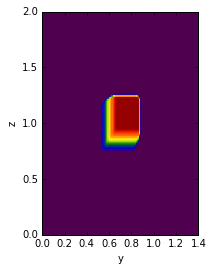

In [71]:
s = ds.slice(0, 0.4) # normal to x axis at x=0.4
width = (3,'cm')
res = [450,600]
frb = s.to_frb(width,res)
q = np.array(frb['q'])

plt.clf()
plt.imshow(q, origin='lower', extent=(0,1.4,0,2))
xlabel('y')
ylabel('z')

This looks reasonable except the coordinates are not right.  Cube starts with 0.1 < x < 0.6 and similarly in y, z.

yt : [INFO     ] 2016-03-23 14:31:22,762 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-23 14:31:22,763 Parameters: domain_dimensions         = [10 14 20]
yt : [INFO     ] 2016-03-23 14:31:22,764 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-23 14:31:22,764 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-03-23 14:31:22,765 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-03-23 14:31:22,770 Making a fixed resolution buffer of (q) 450 by 600
yt : [INFO     ] 2016-03-23 14:31:22,795 Loading field plugins.
yt : [INFO     ] 2016-03-23 14:31:22,796 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-23 14:31:22,796 Loaded astro (15 new fields)
yt : [INFO     ] 2016-03-23 14:31:22,797 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-03-23 14:31:22,798 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-03-23 14:31:22,799 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016

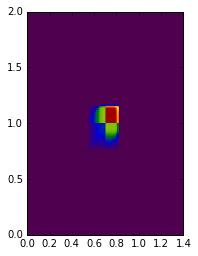

In [72]:
ds = load_yt(3)
s = ds.slice(0, 0.4) # normal to x axis at x=0.4
width = (3,'cm')
res = [450,600]
frb = s.to_frb(width,res)
q = np.array(frb['q'])

plt.clf()
plt.imshow(q, origin='lower', extent=(0,1.4,0,2))

### 3D plots

In [73]:
tf = yt.ColorTransferFunction((0,1))
tf.add_layers(10, colormap = 'RdBu_r')
N = 256

yt : [INFO     ] 2016-03-23 14:38:12,610 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-23 14:38:12,610 Parameters: domain_dimensions         = [10 14 20]
yt : [INFO     ] 2016-03-23 14:38:12,611 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-23 14:38:12,612 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-03-23 14:38:12,613 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-03-23 14:38:12,648 Loading field plugins.
yt : [INFO     ] 2016-03-23 14:38:12,649 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-23 14:38:12,649 Loaded astro (15 new fields)
yt : [INFO     ] 2016-03-23 14:38:12,650 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-03-23 14:38:12,651 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-03-23 14:38:12,653 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-03-23 14:38:12,653 Loaded geometric (112 new fields)
yt : [INFO     ] 2016-03-23 14:38:12,6

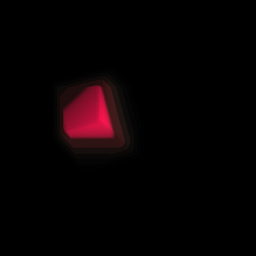

In [76]:
ds = load_yt(1)
c = (0,0,0)
L = (-1,-1.4,-2)
W = 2
cam = ds.camera(c, L, W, N, tf, fields = ['q'], log_fields = [False])
im = cam.snapshot('test_rendering.png')
Image('test_rendering.png')

yt : [INFO     ] 2016-03-23 14:38:16,379 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-23 14:38:16,380 Parameters: domain_dimensions         = [10 14 20]
yt : [INFO     ] 2016-03-23 14:38:16,381 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-23 14:38:16,381 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-03-23 14:38:16,382 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-03-23 14:38:16,410 Loading field plugins.
yt : [INFO     ] 2016-03-23 14:38:16,411 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-03-23 14:38:16,412 Loaded astro (15 new fields)
yt : [INFO     ] 2016-03-23 14:38:16,413 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-03-23 14:38:16,415 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-03-23 14:38:16,416 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-03-23 14:38:16,417 Loaded geometric (112 new fields)
yt : [INFO     ] 2016-03-23 14:38:16,4

Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.
Failed to split grids.


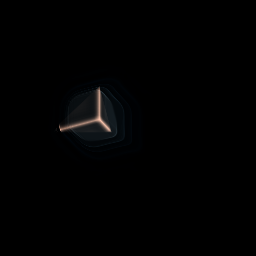

In [77]:
ds = load_yt(3)
c = (0,0,0)
L = (-1,-1.4,-2)
W = 2
cam = ds.camera(c, L, W, N, tf, fields = ['q'], log_fields = [False])
im = cam.snapshot('test_rendering2.png')
Image('test_rendering2.png')